# 311 Service Requests

In [1]:
import pandas as pd

from lets_plot import *
from lets_plot.geo_data import *

The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).



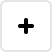
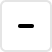
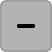
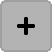
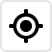
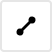
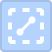
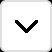
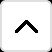
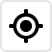
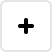
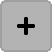
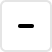
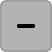
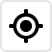
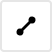
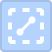
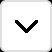
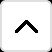
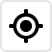

In [2]:
LetsPlot.setup_html()

In [3]:
df = pd.read_csv("../../data/tmp/311_Service_Requests.csv", parse_dates=["Created Date"])\
    [["Created Date", "Complaint Type", "Descriptor", "Location Type", "Vehicle Type", "Latitude", "Longitude"]]\
    .sort_values(by="Created Date")\
    .reset_index(drop=True)
df.columns = ["date", "complaint", "descriptor", "location", "vehicle", "lat", "lon"]
print(df.shape)
df.head()

(311501, 7)


date            complaint        descriptor  \
0 2025-01-01 18:23:35      Illegal Parking   Blocked Hydrant   
1 2025-01-01 18:27:20       HEAT/HOT WATER   ENTIRE BUILDING   
2 2025-01-01 18:29:46  Noise - Residential  Loud Music/Party   
3 2025-01-01 18:33:20       HEAT/HOT WATER   ENTIRE BUILDING   
4 2025-01-01 18:34:04      Dirty Condition             Trash   

                     location vehicle        lat        lon  
0             Street/Sidewalk     NaN  40.791461 -73.940426  
1        RESIDENTIAL BUILDING     NaN  40.824819 -73.938749  
2  Residential Building/House     NaN  40.839398 -73.941576  
3        RESIDENTIAL BUILDING     NaN  40.807002 -73.947716  
4                    Sidewalk     NaN  40.756114 -73.969532

## Noise Complaints

In [4]:
noise_df = df[df["complaint"].str.lower().str.contains("noise")].reset_index(drop=True)
noise_df = noise_df[noise_df["descriptor"].str.lower().str.contains("music")].reset_index(drop=True)
print(noise_df.shape)
noise_df.head()

(49955, 7)


date                complaint        descriptor  \
0 2025-01-01 18:29:46      Noise - Residential  Loud Music/Party   
1 2025-01-01 18:36:30       Noise - Commercial  Loud Music/Party   
2 2025-01-01 18:39:39      Noise - Residential  Loud Music/Party   
3 2025-01-01 18:39:44  Noise - Street/Sidewalk  Loud Music/Party   
4 2025-01-01 18:42:35      Noise - Residential  Loud Music/Party   

                     location vehicle        lat        lon  
0  Residential Building/House     NaN  40.839398 -73.941576  
1         Club/Bar/Restaurant     NaN  40.729780 -74.004214  
2  Residential Building/House     NaN  40.823701 -73.948003  
3             Street/Sidewalk     NaN  40.730016 -73.992383  
4  Residential Building/House     NaN  40.786237 -73.939958

In [5]:
ggplot(noise_df) + geom_bar(aes(x=as_discrete("complaint", order_by='..count..'), color="descriptor", fill="descriptor"), alpha=.5) + theme(legend_position=[.85, .85]) + ggsize(800, 600)

In [6]:
ggplot(noise_df, aes("lon", "lat")) + \
    geom_livemap() + \
    geom_hex() + \
    scale_fill_viridis()

In [7]:
ggplot(noise_df, aes("lon", "lat")) + \
    geom_livemap() + \
    geom_pointdensity() + \
    scale_color_viridis(option='inferno')

## Rare Complaints

In [8]:
def get_rare_df(df, col, n):
    vc = df[col].value_counts()
    values = vc[vc <= n].keys().to_list()
    return df[df[col].isin(values)].reset_index(drop=True)

rare_df = get_rare_df(df, "descriptor", 1)
print(rare_df.shape)
rare_df.head()

(48, 7)


date                   complaint                 descriptor  \
0 2025-01-14 22:17:00                Water System  High Water Pressure (WHP)   
1 2025-01-18 15:11:23                    Pet Shop          Dogs or Cats Sold   
2 2025-01-23 18:03:55  Illegal Animal Kept as Pet                     Ferret   
3 2025-02-10 13:12:12  Bus Stop Shelter Complaint     Snow Removal Requested   
4 2025-02-19 11:58:11          Consumer Complaint            Bail Bond Agent   

              location vehicle        lat        lon  
0                  NaN     NaN  40.776958 -73.959547  
1  Commercial Building     NaN  40.845903 -73.936239  
2            Residence     NaN  40.723553 -73.979259  
3     Bus Stop Shelter     NaN  40.751194 -73.975483  
4             Business     NaN  40.753722 -73.972309

In [9]:
ggplot(rare_df, aes(y="date")) + \
    geom_violin(trim=False, size=0, fill="gray90") + \
    geom_sina(seed=42) + \
    ggsize(400, 600)

In [10]:
new_york_gdf = geocode_cities(names="New York").get_boundaries(15)

ggplot(rare_df) + \
    geom_polygon(data=new_york_gdf, fill="gray90", size=0) + \
    geom_point(aes("lon", "lat")) + \
    geom_label_repel(aes("lon", "lat", label="descriptor"), point_padding=0, max_time=-1, max_overlaps=-1, box_padding=1, size=6, seed=35) + \
    coord_cartesian(xlim=[-74.02, -73.9], ylim=[40.7, 40.88]) + \
    theme_void() + \
    ggsize(1000, 700)